# Problemas 

#1. Area 
Hallar el área de un segmento circular cuya area sea igual a una cuarta parte del área del circulo. Para la solución se sugiere lo siguiente:

a) Encontrar la ecuacion trascendental.

b) Con la ecuación anterior, definir una funcion $f(\theta)=0$. Emplee la funcion labmda de python.

c) Construir una data frame de pandas con la columna "theta" con 1000 registros(filas) entre $[-2\pi, 2\pi]$. Sugerencia, para construir el data frame emplee la función linspace como sigue : np.linspace(-2\*np.pi, 2\*np.pi, 1000 )

d) Construir una segunda columna titulada "F_theta" con los registros f(theta)

f) Realice un gráfico de  "F_theta" vs "theta". Identifique el intervalo de la raiz.

Estime el valor del ángulo empleando los siguientes metodos(Emplee  la documentacion):

g) [Bisección](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html)

h) [Newton-Rapshon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html)

i) [Secante](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html) 

j) [Punto Fijo](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fixed_point.html)


### **a)** Encontrar la ecuacion trascendental.

\begin{equation}
A = As - 2\frac{(r\cos(\theta/2) )(r\sin(\theta/2))}{2} 
\end{equation}

\begin{equation}
\frac{\pi r^2}{4} = \pi r^2\frac{\theta}{2\pi} - r^2(\cos(\theta/2) )(\sin\theta/2)
\end{equation}

\begin{equation}
\frac{\pi}{4} = \frac{\theta}{2} - (\cos(\theta/2) )(\sin\theta/2)
\end{equation}

\begin{equation}
\frac{\pi}{4} = \frac{\theta}{2} - \frac{\sin\theta}{2}
\end{equation}

\begin{equation}
\theta-\sin \theta = \frac{\pi}{2}
\end{equation}

\begin{equation}
f(\theta)= \theta- \sin \theta - \frac{\pi}{2}=0
\end{equation}


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from scipy import optimize, interpolate


###**b)** Con la ecuación anterior, definir una funcion $f(\theta)=0$. Emplee la funcion labmda de python.

In [2]:
f = lambda theta: theta-np.sin(theta)-np.pi/2

###**c)** Construir una data frame de pandas con la columna "theta" con 1000 registros(filas) entre $[-2\pi, 2\pi]$. Sugerencia, para construir el data frame emplee la función linspace como sigue : np.linspace(-2\*np.pi, 2\*np.pi, 1000 )

###**d)** Construir una segunda columna titulada "F_theta" con los registros f(theta)

In [3]:
theta = np.linspace(-2*np.pi, 2*np.pi, 1000)
df = pd.DataFrame()

df["theta"] = theta
df["F_theta"] = f(theta)
df

,theta,F_theta
0,-6.283185,-7.853982
1,-6.270606,-7.853981
2,-6.258027,-7.853979
3,-6.245448,-7.853973
4,-6.232870,-7.853960
...,...,...
995,6.232870,4.712368
996,6.245448,4.712380
997,6.258027,4.712386
998,6.270606,4.712389


###**f)** Realice un gráfico de  "F_theta" vs "theta". Identifique el intervalo de la raiz.

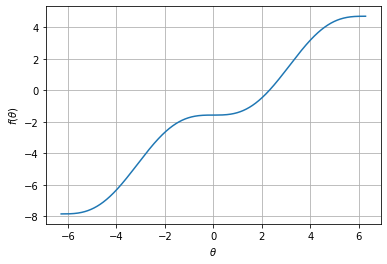

In [4]:
plt.figure()
plt.plot(df["theta"], df["F_theta"] )
plt.xlabel("$\\theta$")
plt.ylabel("$f(\\theta)$")
plt.grid()
plt.show()

###Estime el valor del ángulo empleando los siguientes metodos(Emplee  la documentacion):

###**g)** Bisección

In [5]:
root_bis = optimize.bisect(f, 0, 4)
print(f"EL ángulo por el método de Bisección es: {root_bis:.5}" )
print("En grados:",np.rad2deg(root_bis))

EL ángulo por el método de Bisección es: 2.3099
En grados: 132.3464588341314


###**h)** Newton-Rapshon

In [6]:
fprime = lambda theta: 1 - np.cos(theta)

root_nr = optimize.newton(f, 1, fprime)
print(f"EL ángulo por el método de Newton-Rapshon es: {root_nr:.5}" )
print("En grados:",np.rad2deg(root_nr))

EL ángulo por el método de Newton-Rapshon es: 2.3099
En grados: 132.3464588340929


###**i)** Secante

In [7]:
root_sc = optimize.newton(f, 0)
print(f"EL ángulo por el método de la secante es: {root_sc:.5}" )
print("En grados:",np.rad2deg(root_sc))

EL ángulo por el método de la secante es: 2.3099
En grados: 132.3464588340929


###**j)** Punto Fijo

In [8]:
root_fp = optimize.fixed_point(lambda x: x - f(x), 0, maxiter=100)
print(f"EL ángulo por el método de Punto fijo es: {root_fp:.5}" )
print("En grados:",np.rad2deg(root_fp))

EL ángulo por el método de Punto fijo es: 2.3099
En grados: 132.3464588340929


# 2. Movimiento de proyectiles en presencia de viento.

Supongamos que un proyectil es lanzado desde el origen con una rapidez $v=vo( \cos \theta , \sin \theta) $. Supongamos además que el efecto del viento sobre el proyectil es el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Teniendo presente que si $u$ es la velocidad del viento y $\alpha$ el ángulo que hace dirección de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones diferenciales, asociada al estado de movimiento del [proyectil](https://iopscience.iop.org/article/10.1088/0143-0807/36/2/025016/meta):


\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_x-u\sin \alpha ),
\end{equation}

donde b es el párametro de rozamiento. La soluciones a las ecuaciones anteriores vienen dadas por:

Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html


0. Establezca las siguietnes condiciones inciales.

```
#Parametros iniciales

v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

Params = (alpha, v0, b, u,g)  #Parametros en tupla.

```



1. Defina dos funciones, una para x y otra para y. 

```

#Posicion en x
def pos_x(t, theta, alpha, v0, b, u,g):
  x = #escriba aca la expresión
  return x

#Posicion en y
def pos_y(t, theta, alpha, v0, b, u,g):


  y = #escriba aca la expresión
  return y 

```

2. Construya un diccionario con las claves "X", "Y", "Tiempo"

3. Con el diccionario construya un data frame de pandas llamado df con los nombres de columnas "X", "Y", "Tiempo"  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html. Defina 1000 registros para el intervalo de tiempo elegido.


4. Realice un gráfico de x como función del tiempo, de y como función del tiempo y la trayectoria de la partícula (df["X"], df["tiempo"], df["Y"]).


5. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numéricamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.  

6. Construya una  grafica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 90 grados cada 5 grados.

7. Realice una interpolacion de R como función de theta.



In [9]:
# Condiciones iniciales

v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

Params = (alpha, v0, b, u, g)  #Parametros en tupla.

1. Defina dos funciones, una para x y otra para y. 

In [10]:
#Posicion en x
def pos_x(t, theta, alpha, v0, b, u,g):
  T1 = u * t * np.cos(alpha) #Termino 1
  T2 = (1./b)*(v0*np.cos(theta) - u*np.cos(alpha) ) #Termino 2
  T3 = (1 - np.e**(-b*t)) #Termino 3

  return T1 + T2*T3 
    

#Posicion en y
def pos_y(t, theta, alpha, v0, b, u,g):

  T1 = (1./b)*(g/b + v0*np.sin(theta) - u*np.sin(alpha) ) #termino 1
  T2 = (1 - np.e**(- b * t)) #termino 2
  T3 = (g / b - u *  np.sin(alpha))*t #termino 3

  return T1* T2 - T3

2. Construya un diccionario con las claves "X", "Y", "Tiempo"

In [11]:
t = np.linspace(0, 20, 1000) #Tiempo 
x = pos_x(t, theta, *Params)
y = pos_y(t, theta, *Params) 
pos = { "X": x , "Y": y, "Tiempo": t }
#pos

3. Con el diccionario construya un data frame de pandas llamado df con los nombres de columnas "X", "Y", "Tiempo"  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html. Defina 1000 registros para el intervalo de tiempo elegido.

In [30]:
df = pd.DataFrame.from_dict(pos)
df

,X,Y,Tiempo
0,0.000000,0.000000,0.00000
1,0.848652,0.846989,0.02002
2,1.695854,1.689205,0.04004
3,2.541608,2.526653,0.06006
4,3.385914,3.359336,0.08008
...,...,...,...
995,315.908872,-897.057712,19.91992
996,315.843561,-899.219473,19.93994
997,315.777714,-901.382998,19.95996
998,315.711332,-903.548284,19.97998


4. Realice un gráfico de x como función del tiempo, de y como función del tiempo y la trayectoria de la partícula (df["X"], df["tiempo"], df["Y"]).

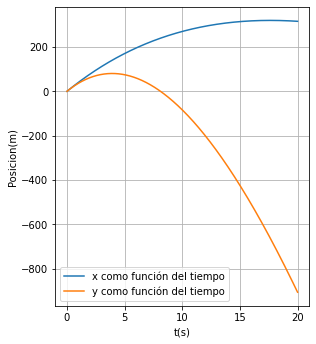

In [31]:
plt.figure(figsize=(10,5.5))
plt.subplot(121)
plt.plot(df["Tiempo"], df["X"], label="x como función del tiempo") 
plt.plot(df["Tiempo"], df["Y"], label="y como función del tiempo")
plt.xlabel("t(s)")
plt.ylabel("Posicion(m)")
plt.legend()
plt.grid()
plt.show()

5. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numéricamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.  

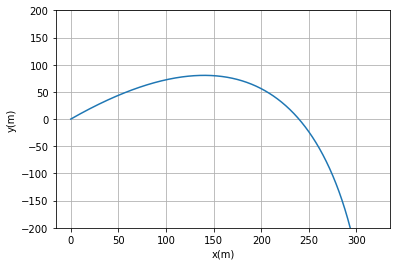

In [32]:
#De las condiciones iniciales ya tenemos theta = 45°

plt.plot(df["X"], df["Y"]) 
plt.xlabel("x(m)")
plt.ylabel("y(m)")
plt.ylim(-200,200)
plt.grid()
plt.show()

In [40]:
# Del dataframe obtenido en el punto 3 obtengo los dos valores del tiempo donde y=0 descartando el punto de orgien se tiene: 

df.loc[405:406,['Y', 'Tiempo']]

,Y,Tiempo
405,0.130388,8.108108
406,-0.612737,8.128128


El alcance máximo es aproximadamente 239.7591116573081  Metros 



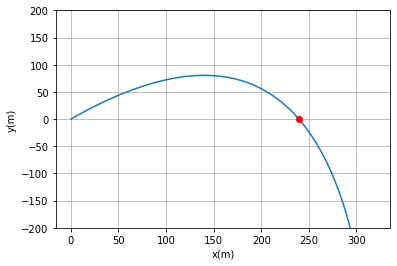

In [54]:
# Como se observa en el valor anterior el cambio de Y aproximadamente en el tiempo 8.12

alc_max = pos_x(8.12,theta, *Params)
print ('El alcance máximo es aproximadamente', alc_max, ' Metros \n')

plt.plot(df["X"], df["Y"]) 
plt.plot (alc_max, 0, 'o', color='red')
plt.xlabel("x(m)")
plt.ylabel("y(m)")
plt.ylim(-200,200)
plt.grid()
plt.show()

6. Construya una  grafica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 90 grados cada 5 grados.

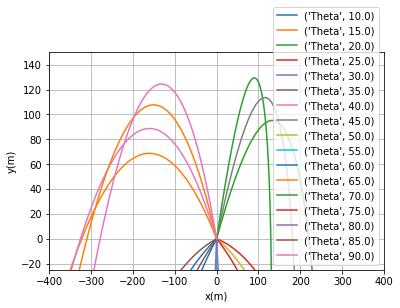

In [89]:
# Gráfica Theta entre 10 y 90 grados con aumentos de 5 grados.

theta_1 = np.linspace(10 , 90, 17)

for i in theta_1:
  x1 = pos_x(t, i, *Params)
  y1 = pos_y(t, i, *Params) 
  pos1 = { "X": x1 , "Y": y1, "Tiempo": t }
  df1 = pd.DataFrame.from_dict(pos1)
  
 
  plt.plot(df1["X"], df1["Y"], label=("Theta",i)) 

plt.xlabel("x(m)")
plt.ylabel("y(m)")
plt.legend()
plt.xlim(-400,400)
plt.ylim(-25,150)
plt.grid()
plt.show()

7. Realice una interpolacion de R como función de theta.